# Continuous-Variable (CV) Quantum Computing

The usual quantum computing model we are familiar with is quantum circuit model where the input is tensor product of the individual qubit states. A qubit can only have discrete states, either |0> or |1> or a superposition of these two states. So, quantum circuit model is based on finite-dimensional Hilbert Spaces whereas in continuous-variable quantum computing, the inputs are physical observables like energy of a quantum system (Hamiltonian) or the strength of an electromagnetic field which can have continuous values over closed intervals and thus, are continuous variables. So, continuous-variable quantum computation deals with infinite-dimensional Hilbert Spaces. Similarly, the measurement in quantum circuit model results in discrete outcomes making the eigenspectra of the observables discrete while the observables have continuous eigenspectra in CV model. Information is carried in CV model in the quantum states of bosonic modes, corresponding to quantized radiation modes of electromagnetic field called as qumodes which form wires in the quantum circuit. In other words, continuous-variable quantum computation is analog and quantum computation using qubits is digital. CV quantum computers are realized mostly using photonic and ion-trap implementations.

Generally, the data that is acquired for training our machine learning models are arbitrary-valued or are continuous random values for which continuous-variable quantum computing renders more natural implementation for quantum machine learning. 

Recently there has been some significant work on designing deep quantum neural networks using continuous-variable quantum computing model. The building block of deep learning is feedforward neural network which is a multi-layered structure where each layer performs some in its input and forwards it to the successive layer. The transformation of each layer can be written in terms of equation as

$$ L(x)=\psi(Wx+b) $$

where x $ \in R^n $ is an n-bit input vector, $ W \in R^{m \times n} $ is a weight matrix, b $ \in R^m $is a bias vector and $ \psi $ is a non-linear activation function. The inner transformation Wx is a linear transformation which is followed by translation by bias vector b. So, (Wx+b)  is an affine transformation. If N such layers are stacked together, the output vector **y** corresponding to input vector **x** can be written as **y** = $ L_N .....L_1 (x) $.

There are two formalisms to represent the continuous-variable quantum information: wave function and phase space formalism. In case of phase space formalism, state of a single qumode is represented using two real-valued variables (x,p) much like a qubit requires two complex amplitudes to describe its state and state of N qumodes require 2N real-valued variables. Transformations on these qumode states could be either gaussian or non-gaussian.  Gaussian transformations or Gaussian unitaries are those that preserve the gaussian character of a quantum state and analogous to affine transformations in the classical sense. Simplest single qumode Gaussian unitaries like displacement operator, phase rotation, beam splitter and squeezing operator are sufficient to generate any arbitrary gaussian unitary operation acting on N qumodes of the electromagnetic field. However, a non-gaussian operator needs to be added for universality of CV quantum computation i.e. non-gaussian gate $\psi $ which is analogous to the non-linear activation function in classical sense.


A general Gaussian transformation G on N qumodes can be summarized as  $ G  \left[\begin{array}{c}x\\p\end{array}\right] \rightarrow M \left[\begin{array}{c}x\\p\end{array}\right] + \left[\begin{array}{c}Re(\alpha)\\Im(\alpha)\end{array}\right] $ where M is a real-valued symplectic matrix analogous to weight matrix W, $ \alpha \in C^N \cong R^{2N} $  and displacement vector $ \left[\begin{array}{c}Re(\alpha)\\Im(\alpha)\end{array}\right] $ which is analogous to the bias vector b.
Finally, supposing z=(x,p), we can write the transformation in one layer of CV quantum neural network as . 
$ L(z)= \psi (Mz+\alpha) $

##  References 

Killoran, Nathan et al. “Continuous-Variable Quantum Neural Networks.” Physical Review Research 1.3 (2019): n. pag. Crossref. Web.

En.wikipedia.org. 2020. Continuous-Variable Quantum Information. [online] Available at: <https://en.wikipedia.org/wiki/Continuous-variable_quantum_information> [Accessed 15 July 2020].

Phys.org. 2020. Physicists Extend Quantum Machine Learning To Infinite Dimensions. [online] Available at: <https://phys.org/news/2017-03-physicists-quantum-machine-infinite-dimensions.html> 

Lau, Hoi-Kwan et al. “Quantum Machine Learning over Infinite Dimensions.” Physical Review Letters 118.8 (2017): n. pag. Crossref. Web.


# Adiabatic Quantum Computing

Adiabatic quantum computing is a new paradigm of quantum computing which is considered theoretically robust against nose, which seems to be the major obstacle in the circuit model. In this technique, a physical system is initialized in the ground state or lowest energy configuration state of a simpler Hamiltonian which is easily prepared. Then, by slowly changing the control parameters, the system undergoes adiabatic evolution. The adiabatic theorem says that if the evolution is slow enough, or in other words, if the perturbation on the system is gradual enough, the system at any instantaneous time during the evolution remains in the ground state of the instantaneous Hamiltonian. Then the system gradually evolves into the ground state of the problem Hamiltonian which might be easy to construct but exponentially difficult to find with a classical algorithm. One designs the evolution such that the ground state of the final Hamiltonian is the required solution to the optimization problem. Such an algorithm is known as Adiabatic Quantum Optimization (AQO).

Adiabatic evolution can be written as convex combination of initial and final Hamiltonian as,
$ H(t)=(1-t)H_0 + tH_f $
where H(t) is the instantaneous Hamiltonian at time t, $ H_0 $ is the initial Hamiltonian and $ H_f $ is the final Hamiltonian. 
The total time taken(T) for the evolution must scale as $ \frac {1}{Min_t g(t)^2} $ where g(t) is the difference between two smallest eigenvalues of H(t) i.e. the spectral gap of ground state and first excited state of H(t). 

Considering the work of Pudenz et. al. in 2012, they have designed a solution to binary classification problem using quantum adiabatic evolution. They used quantum adiabatic evolution in both learning and testing phase for classifying whether a particular input/output pair of a software is an error or not. For the learning phase, they use the technique of quantum boosting which is similar to boosting technique used in the classical machine learning problems where multiple weak classifiers are combined together to form a strong classifier which classifies the data vector to one of the two groups much better than its components. Simple classifying rules that distinguish the data sets less accurately are combined to form a more accurate classifying rule. So, in order to find optimal binary weights with which a set of weak classifiers are linearly combined into a strong classifier, the weak classifiers are adiabatically evolved such that the optimal binary weights form the ground state of a certain Hamiltonian.

In the testing phase, the classifying formulas generated from the learning phase are converted to some classifying function that generates a lower energy the more likely its input i.e. input/output pair of a software represents an error. This function is converted into the problem Hamiltonian and strong classifiers are adiabatically evolved over a superposition of all possible input/output pairs (equivalently all operations of the software). Then, the ground state of the problem Hamiltonian will correspond to the input/output pair which has the lowest energy computed by classifying function and hence, is the most probable to represent an error.

## References
Pudenz, Kristen L., and Daniel A. Lidar. “Quantum Adiabatic Machine Learning.” Quantum Information Processing 12.5 (2012): 2027–2070. Crossref. Web.


### Code for simulation of NAND gate



In [8]:
from collections import defaultdict
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
Q=defaultdict(int)
Q = {('x1', 'x2'): -1, ('x1', 'x3'): 2, ('x2', 'x3'): 2, ('x3', 'x3'): -3}
sampleset = sampler.sample_qubo(Q, num_reads=10000)
print(sampleset)        

  x1 x2 x3 energy num_oc. chain_.
0  0  0  1   -3.0    9993     0.0
1  1  1  0   -1.0       4     0.0
2  0  1  1   -1.0       1     0.0
3  1  0  1   -1.0       1     0.0
4  1  0  0    0.0       1     0.0
['BINARY', 5 rows, 10000 samples, 3 variables]



$ x_1$ and $x_2$ are the inputs to our NAND gate and $x_3 =  \lnot(x_1 \wedge  x_2)$ is the output.
In line 3, we’re sending our code to the D-Wave machine to execute.
Q is the coefficient matrix which is of $3\times3$ size since we have three variables: $x_1, x_2$ and $x_3$.
A penalty function is constructed to simulate NAND gate which penalizes (increases the value of the function) for an invalid state and minimizes (decreases the value of the function) for a valid state. The first four rows in the output correspond to valid states because they rightly simulate NAND gate while the fifth row is considered invalid. 
If we have N variables $x_1,.......,x_N$ where each variable can have binary values 0 and 1, the D-Wave machine tries to find the assignments of values which minimize the expression $\sum_i^N q_ix_i + \sum_{i<j}^N q_{i,j}x_ix_j$
Where $q_i$ and $q_{i,j}$ are linear and quadratic coefficients whose values we need to find out by fitting the inputs and outputs of NAND gate into the above equation. These values then fill up the coefficient matrix Q.
Since N=3, our penalty function will be of the form $q_1x_1 + q_2x_2 + q_3x_3+q_{1,2}x_1x_2+q_{1,3}x_1x_3+q_{2,3}x_2x_3$
The above program is run for 10000 shots in the machine. As we can see in the output, the four valid states correspond to the lower energy values of -3 and -1 and the fifth invalid state has a higher energy value of 0. 

# Quantum Circuit Model
 
In this model, information is carried in the form of state of qubits. Qubits are two-level quantum systems which could be an electron that has two-level energy systems, photon that can have only two states of polarization and so on. Operations on the quantum data or quantum states are performed by quantum circuits, which are all unitary operations and each can be represented by the corresponding Unitary matrices. The unitary matrices (in complex domain) are analogous to orthogonal matrices (in real domain) because they preserve the lengths and angles between the vectors. Moreover, these unitary operations are reversible as any unitary matrix U satisfies the relation  $UU^\dagger= I$. So, if unitary operations are performed with their complex conjugates in the reverse manner, we can reverse quantum computation. It has been shown that quantum computation also has several families of universal quantum gates which can simulate any arbitrary quantum circuit similarly to the case of universality in classical computation by NAND gate.  Reversible AND gate (Toffoli gate) is a universal quantum gate. Thus, by using NOT and Toffoli gates, we can simulate NAND gate which shows that quantum computers can simulate classical computers. Also, recently it has been shown that adiabatic quantum computing is equivalent to quantum circuit model with a polynomial overhead. 

In many machine learning algorithms, matrix operations are performed to vectors in high-dimensional vector spaces which form the basis of quantum computing. 
Machine learning can be divided into three categories: supervised, unsupervised and reinforcement learning. Supervised machine learning is the type where the algorithm infers a function from analyzing some labelled training data which consists of a bunch of input-output pairs. Input is a vector and output is a desired value which classifies the input data to a specific class. The optimal inferred function should be able to map the unseen input data to their correct labels or classes. Supervised learning makes use of Support Vector Machines (SVM) to be able to construct efficient classifiers. If the data points are not linearly separable, the data points are projected into a higher-dimensional space where the projected data points are linearly separable. In other words, SVMs try to find the best hyperplane that classifies the data points into their right classes. However, when the dimension where the data points are projected keeps on increasing and the data points start getting more complex, then training the algorithm classically with the data sets can take significantly long time and can be performance-intensive. This is where the exponential computation power of quantum computing comes into play. We want to analyze the complex data sets quickly and more efficiently so that we can find trends and relationship between data variables which are intractable by classical computers. Quantum SVM algorithm uses the classical machine learning algorithm and applies support vector machine on a quantum circuit in order to be efficiently processed on a quantum computer.

### Code for Bell measurement


In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram


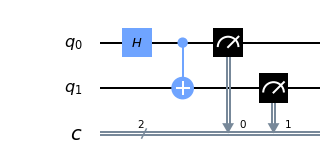

In [12]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1], [0,1])
qc.draw('mpl')

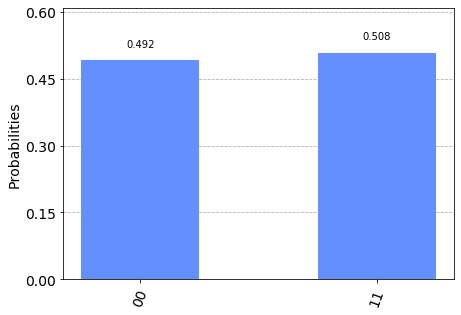

In [16]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(qc,backend=simulator).result()
plot_histogram(result.get_counts(qc))